## data : https://finance.yahoo.com/cryptocurrencies

In [ ]:
https://coinmarketcap.com/

In [3]:
conda install gcc

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - gcc

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.


In [1]:
conda install -c conda-forge fbprophet

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cctools-895                |                1         1.9 MB  conda-forge
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    clang-4.0.1                |                1        73.9 MB  conda-forge
    clang_osx-64-4.0.1         |      h1ce6c1d_17         145 KB  conda-forge
    clangxx-4.0.1              |                1         263 KB  conda-forge
    clangxx_osx-64-4.0.1       |      h22b1bf0_17         146 KB  conda-forge
    conda-4.9.2                |   py37hf985489_0         3.0 MB 

In [1]:
! pip install pystan

In [2]:
!pip install fbprophet

NO HIGH FREQUENCY DATA . Only daily data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import math
import pandas.util.testing as tm
from sklearn import linear_model
from sklearn.metrics import r2_score

from datetime import datetime
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
df_xrp = pd.read_csv('XRP-USD.csv')

In [26]:
df_xrp.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790


In [27]:
df_xrp.shape

(1828, 7)

In [20]:
df_btc = pd.read_csv('BTC-USD.csv')

In [28]:
df_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900
1,2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
2,2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900
3,2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000
4,2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100


In [29]:
df_btc.shape

(1828, 7)

In [21]:
df_eth = pd.read_csv('ETH-USD.csv')

In [30]:
df_eth.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-24,0.946442,0.948055,0.895931,0.900191,0.900191,524195
1,2015-11-25,0.893827,0.899493,0.851106,0.863537,0.863537,622991
2,2015-11-26,0.863273,0.903643,0.804360,0.884183,0.884183,947473
3,2015-11-27,0.882100,0.900051,0.860695,0.867951,0.867951,403813
4,2015-11-28,0.868102,0.929293,0.862122,0.915703,0.915703,462464


In [31]:
df_eth.shape

(1828, 7)

In [22]:
df_btc_cash = pd.read_csv('BCH-USD.csv')

In [32]:
df_btc_cash.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-23,555.885986,578.971008,411.776001,413.059998,413.059998,85013
1,2017-07-24,412.579987,578.892029,409.210999,440.700989,440.700989,190952
2,2017-07-25,441.345001,541.658020,338.091003,406.897003,406.897003,524908
3,2017-07-26,407.082001,486.158997,321.791992,365.816010,365.816010,1784640
4,2017-07-27,417.097992,460.968994,367.777008,385.479004,385.479004,533207


In [33]:
df_btc_cash.shape

(1221, 7)

In [24]:
df_link = pd.read_csv('LINK-USD.csv')

In [34]:
df_link.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-20,0.156494,0.189448,0.152489,0.189165,0.189165,2718640
1,2017-09-21,0.189132,0.207892,0.155292,0.169680,0.169680,2126270
2,2017-09-22,0.169826,0.181675,0.139869,0.150503,0.150503,1423220
3,2017-09-23,0.149562,0.157440,0.126297,0.131129,0.131129,1186670
4,2017-09-24,0.131110,0.190250,0.130275,0.170278,0.170278,1025740


In [35]:
df_link.shape

(1162, 7)

Steps :

- Lag(old data) the data and then tune the lookback days for improving the predictions on the recent data.

- Lets use linear regression, random forest , XGBoost and thn finally LSTM/RNN or stacked auto encoders and compare the evaluation metrics for each of the models in terms of price forecasting .

 -  Use LSTM network for each coin/stock/asset and predict its nwext day proce usimng the time series forecasting . We can use just one LSTM network for each coin . If we are forecasting the price the multiple coins , we have to build separate LSTM/RNN networks for each of them. I would suggest we use just 3-4 different coins for time series modelling.
 
 - Cost functions has to be optimized using Auto correlation , moving averages, rolling mean etc

 - Mean-Variance Portfolio

- Run backtesting


- After time series forecasting , we have to move onto the optimization section where we perform asset management/ portfolio optimization for the Hedge funds/investment banks

- Structure the use case in such a way that lets say you have $10k at your disposal and we are required to invest in     various crypto currencies and buy different coins. The problem becomes a portfolio optimization problem

- Calculate the Sharpe ratio to find which coins will perform well in the next 2 weeks
We have to setup our loss function in LSTM that way. 

Sharpe's ratio :  difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment.

Sharpe ratio measures the performance of an investment compared to a risk-free asset, after adjusting for its risk


-- The main issue is about how we setup our loss function in our LSTM network for portfolio portfolio optimization.

Loss = -100. * mean(P * R)

 where p =  value between 0 and 1, which indicates how much position (percentage of capital) of the coin/asset we should hold to tomorrow
 r = rate of the price change = old price - new price/old price 
 our LSTM network will have one LSTM layer, dense layer, batch normalization, activation layer with activation functions of relu, tanh, leaky relu etc . No softmax function because thats for classification problems
 
 Calculate the returns of our investment :  Buy price - selling price/buy price  =  returns
 
 Calculate the sharpe's ratio for each of the coins or assets
 
 Use monte carlo simulations( Randomly assign weights to iur portfolio combinations)  to try out a bunch of random allocations and determine which random allocation has the bet sharpe's ratio.
 
 Come up with a pie chart showing the best possible portfolio allocation .
 
 - We can also use reinforcement learning with 20-30 lines of code if possible and create an agent which can then optimize asset/investment portfolio between multiple coins by taking there price series data and output holdings in each and then keep re-adjusting the portfolio until we reach the best one.

In [16]:
df_binance = pd.read_csv('BNB-USD.csv')

In [17]:
df_binance.shape

(1218, 7)

In [18]:
df_binance.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1.218000e+03
mean,15.047967,15.537083,14.525292,15.068713,15.068713,1.813308e+08
std,8.616116,8.820203,8.395894,8.616971,8.616971,1.617170e+08
min,0.099721,0.101211,0.096109,0.099867,0.099867,9.284000e+03
25%,9.524122,9.769015,9.229625,9.531628,9.531628,4.008525e+07
50%,14.634150,15.169550,14.125620,14.653100,14.653100,1.527490e+08
75%,20.392702,20.920997,19.839625,20.457458,20.457458,2.688812e+08
max,38.812336,39.566536,37.544617,38.815918,38.815918,1.144638e+09


In [36]:
df_xrp['Avg_Price'] = (2 * df_xrp['Close'] + df_xrp['High'] + df_xrp['Low']) / 4

In [37]:
df_btc['Avg_Price'] = (2 * df_btc['Close'] + df_btc['High'] + df_btc['Low']) / 4

In [38]:
df_eth['Avg_Price'] = (2 * df_eth['Close'] + df_eth['High'] + df_eth['Low']) / 4

In [39]:
df_btc_cash['Avg_Price'] = (2 * df_btc_cash['Close'] + df_btc_cash['High'] + df_btc_cash['Low']) / 4

In [40]:
df_link['Avg_Price'] = (2 * df_link['Close'] + df_link['High'] + df_link['Low']) / 4

In [4]:
df_ripple.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_Price
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451,0.004291
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940,0.004243
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356,0.004297
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520,0.004311
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790,0.004271
5,2015-11-28,0.004275,0.004275,0.004208,0.004238,0.004238,195480,0.004240
6,2015-11-29,0.004243,0.004299,0.004234,0.004299,0.004299,197822,0.004283
7,2015-11-30,0.004298,0.004322,0.004185,0.004201,0.004201,272695,0.004227
8,2015-12-01,0.004202,0.004208,0.004054,0.004090,0.004090,312401,0.004110
9,2015-12-02,0.004091,0.004189,0.004041,0.004173,0.004173,328403,0.004144


In [41]:
df_xrp_close = df_xrp.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_xrp_close

,Date,Close
0,2015-11-23,0.004288
1,2015-11-24,0.004242
2,2015-11-25,0.004318
3,2015-11-26,0.004291
4,2015-11-27,0.004276
...,...,...
1823,2020-11-19,0.303766
1824,2020-11-20,0.328068
1825,2020-11-21,0.458344
1826,2020-11-22,0.443700


In [42]:
df_btc_close = df_btc.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc_close

,Date,Close
0,2015-11-23,323.045990
1,2015-11-24,320.045990
2,2015-11-25,328.205994
3,2015-11-26,352.683990
4,2015-11-27,358.041992
...,...,...
1823,2020-11-19,17817.089844
1824,2020-11-20,18621.314453
1825,2020-11-21,18642.232422
1826,2020-11-22,18370.001953


In [43]:
df_eth_close = df_eth.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_eth_close

,Date,Close
0,2015-11-24,0.900191
1,2015-11-25,0.863537
2,2015-11-26,0.884183
3,2015-11-27,0.867951
4,2015-11-28,0.915703
...,...,...
1823,2020-11-20,509.744568
1824,2020-11-21,549.486633
1825,2020-11-22,558.068115
1826,2020-11-23,608.454041


In [44]:
df_btc_cash_close = df_btc_cash.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc_cash_close

,Date,Close
0,2017-07-23,413.059998
1,2017-07-24,440.700989
2,2017-07-25,406.897003
3,2017-07-26,365.816010
4,2017-07-27,385.479004
...,...,...
1216,2020-11-20,258.854919
1217,2020-11-21,301.924805
1218,2020-11-22,286.993408
1219,2020-11-23,323.025818


In [45]:
df_link_close = df_link.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_link_close

,Date,Close
0,2017-09-20,0.189165
1,2017-09-21,0.169680
2,2017-09-22,0.150503
3,2017-09-23,0.131129
4,2017-09-24,0.170278
...,...,...
1157,2020-11-20,14.078273
1158,2020-11-21,15.355934
1159,2020-11-22,14.444801
1160,2020-11-23,15.270844


In [46]:
df_xrp_close['Date'] = pd.to_datetime(df_xrp_close['Date'])

In [47]:
df_btc_close['Date'] = pd.to_datetime(df_btc_close['Date'])

In [48]:
df_eth_close['Date'] = pd.to_datetime(df_eth_close['Date'])

In [49]:
df_btc_cash_close['Date'] = pd.to_datetime(df_btc_cash_close['Date'])

In [50]:
df_link_close['Date'] = pd.to_datetime(df_link_close['Date'])

In [59]:
df_xrp_close.columns = ['ds', 'y']
df_btc_close.columns = ['ds', 'y']
df_eth_close.columns = ['ds', 'y']
df_btc_cash_close.columns = ['ds', 'y']
df_link_close.columns = ['ds', 'y']

In [60]:
prophet_model_xrp = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_xrp.add_country_holidays(country_name='US')
prophet_model_xrp.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [61]:
prophet_model_btc = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_btc.add_country_holidays(country_name='US')
prophet_model_btc.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [62]:
prophet_model_eth = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_eth.add_country_holidays(country_name='US')
prophet_model_eth.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [63]:
prophet_model_btc_cash = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_btc_cash.add_country_holidays(country_name='US')
prophet_model_btc_cash.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [64]:
prophet_model_link = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model_link.add_country_holidays(country_name='US')
prophet_model_link.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [65]:
prophet_model_xrp.fit(df_xrp_close)
prophet_model_btc.fit(df_btc_close)
prophet_model_eth.fit(df_eth_close)
prophet_model_btc_cash.fit(df_btc_cash_close)
prophet_model_link.fit(df_link_close)

In [66]:
future_xrp = prophet_model_xrp.make_future_dataframe(periods=30)
future_xrp.tail()

,ds
1853,2020-12-19
1854,2020-12-20
1855,2020-12-21
1856,2020-12-22
1857,2020-12-23


In [67]:
future_btc = prophet_model_btc.make_future_dataframe(periods=30)
future_btc.tail()

,ds
1853,2020-12-19
1854,2020-12-20
1855,2020-12-21
1856,2020-12-22
1857,2020-12-23


In [68]:
future_eth = prophet_model_eth.make_future_dataframe(periods=30)


In [69]:
future_btc_cash = prophet_model_btc_cash.make_future_dataframe(periods=30)


In [70]:
future_link = prophet_model_link.make_future_dataframe(periods=30)


In [71]:
forecast_xrp = prophet_model_xrp.predict(future_xrp)


In [72]:
forecast_btc = prophet_model_btc.predict(future_btc)

In [73]:
forecast_eth = prophet_model_eth.predict(future_eth)

In [74]:
forecast_btc_cash = prophet_model_btc_cash.predict(future_btc_cash)

In [75]:
forecast_link = prophet_model_link.predict(future_link)

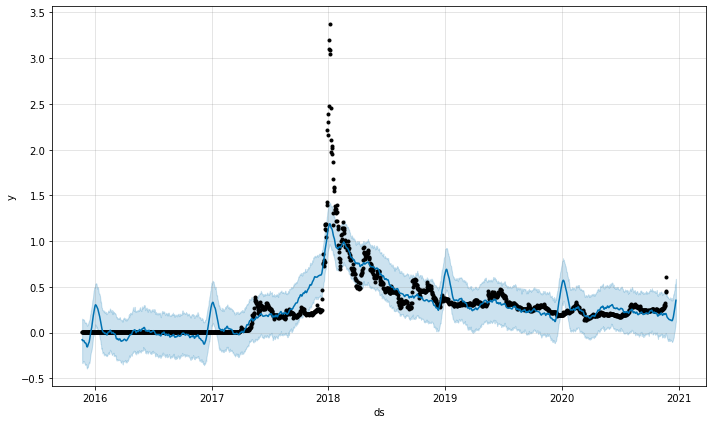

In [76]:
prophet_model_xrp.plot(forecast_xrp);

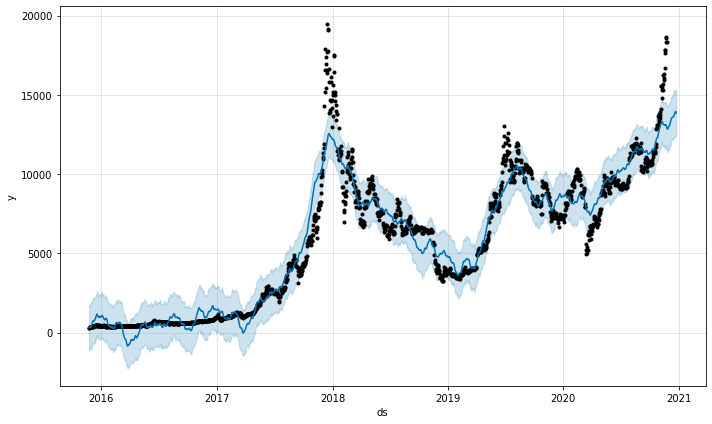

In [77]:
prophet_model_btc.plot(forecast_btc);

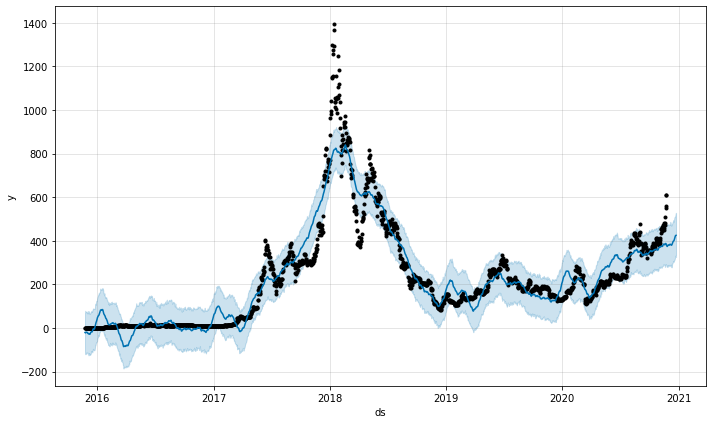

In [78]:
prophet_model_eth.plot(forecast_eth);

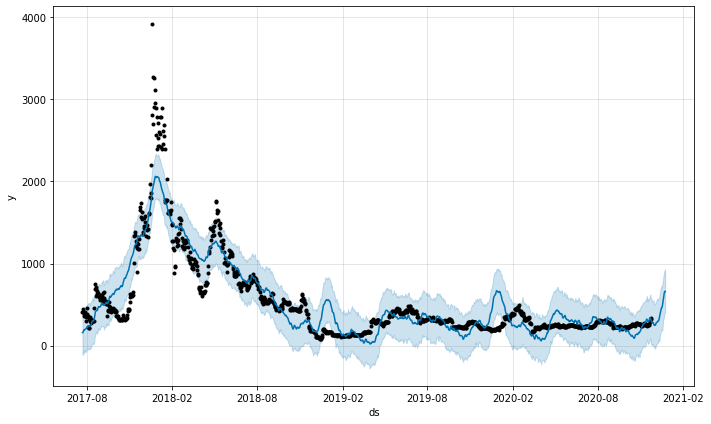

In [79]:
prophet_model_btc_cash.plot(forecast_btc_cash);

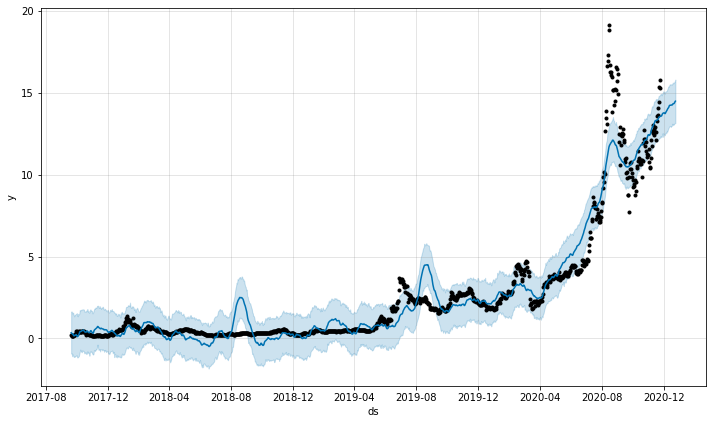

In [80]:
prophet_model_link.plot(forecast_link);

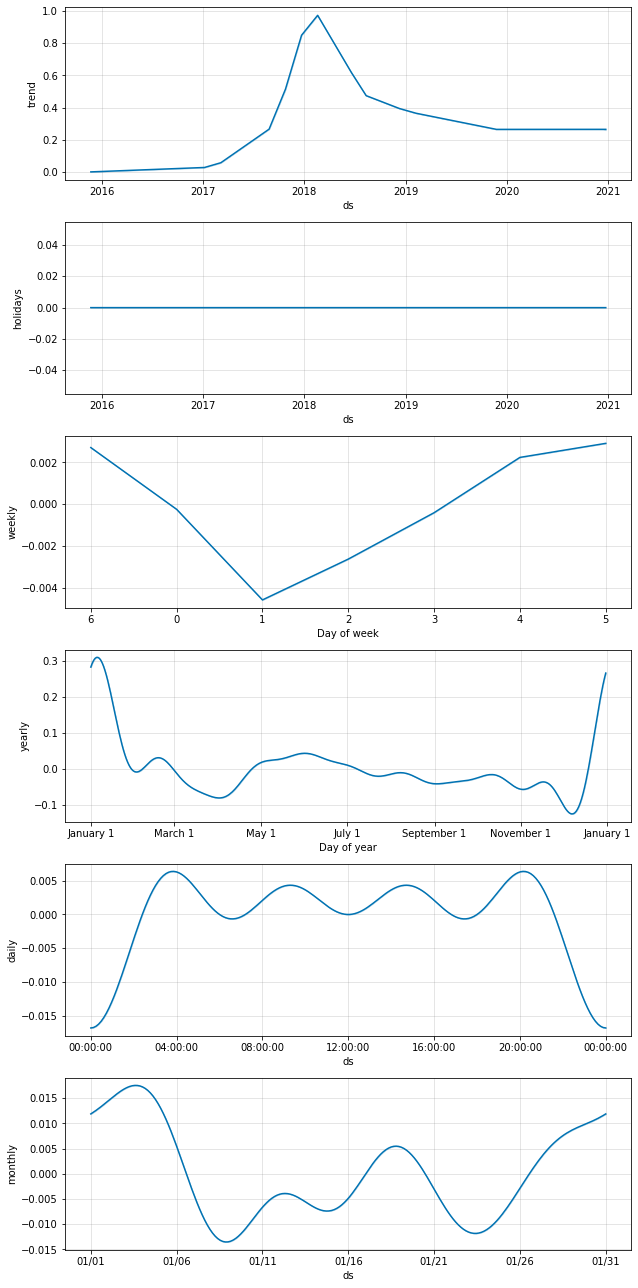

In [82]:

prophet_model_xrp.plot_components(forecast_xrp);

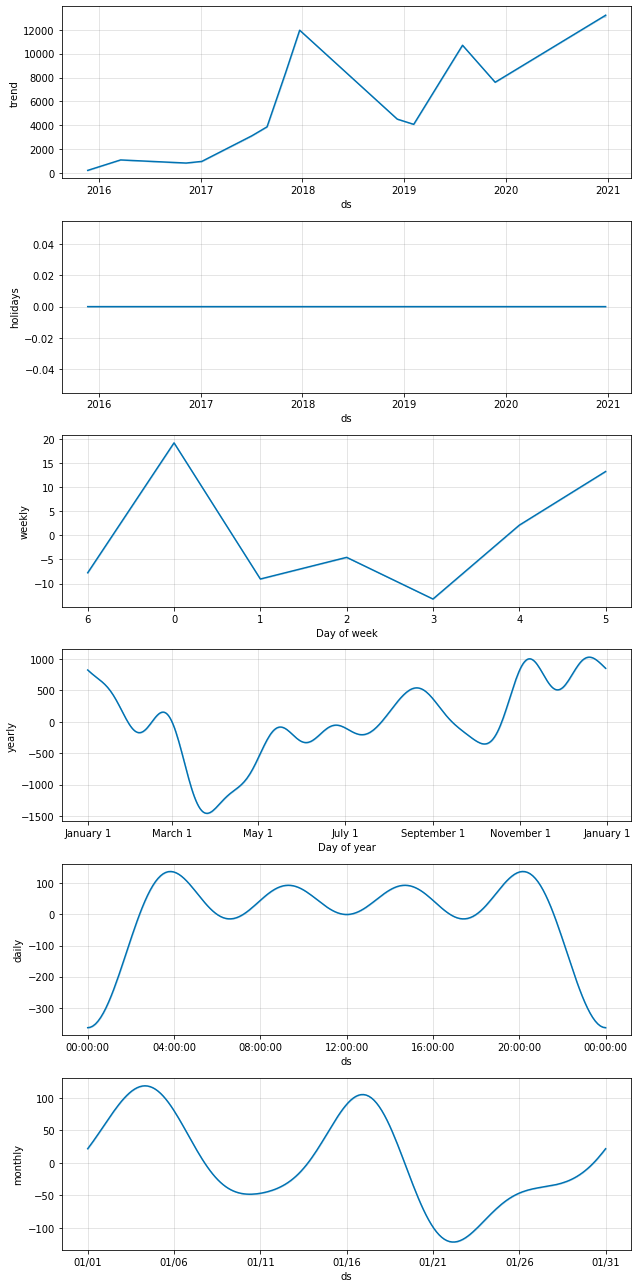

In [83]:
prophet_model_btc.plot_components(forecast_btc);

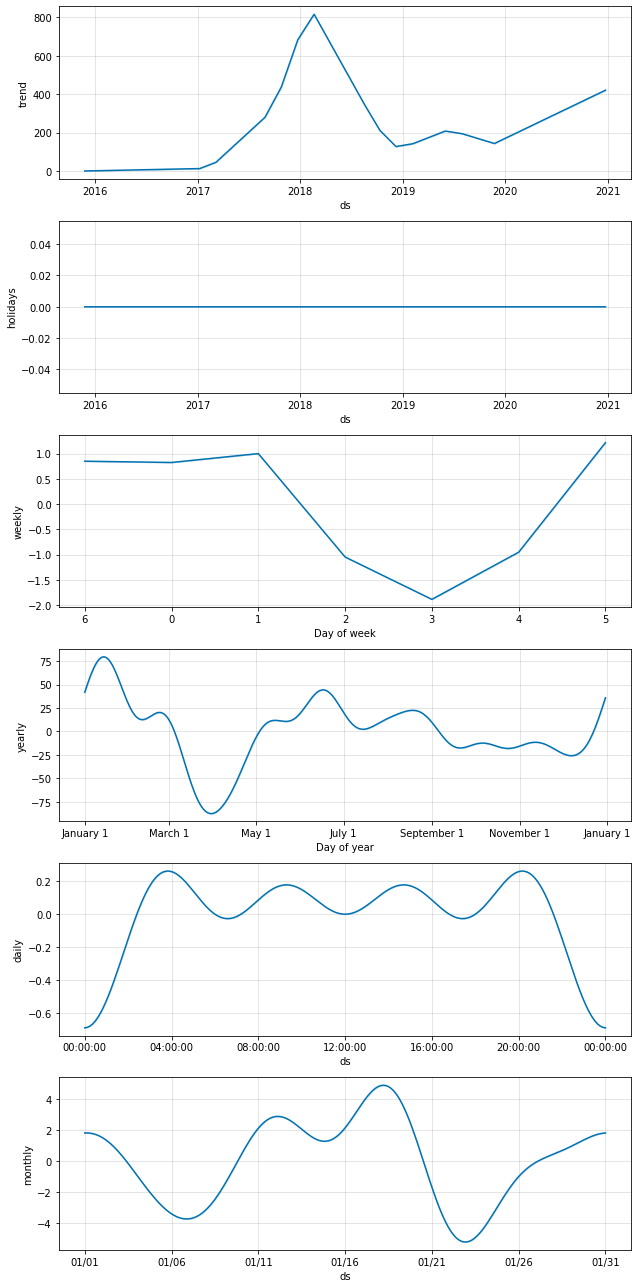

In [84]:
prophet_model_eth.plot_components(forecast_eth);

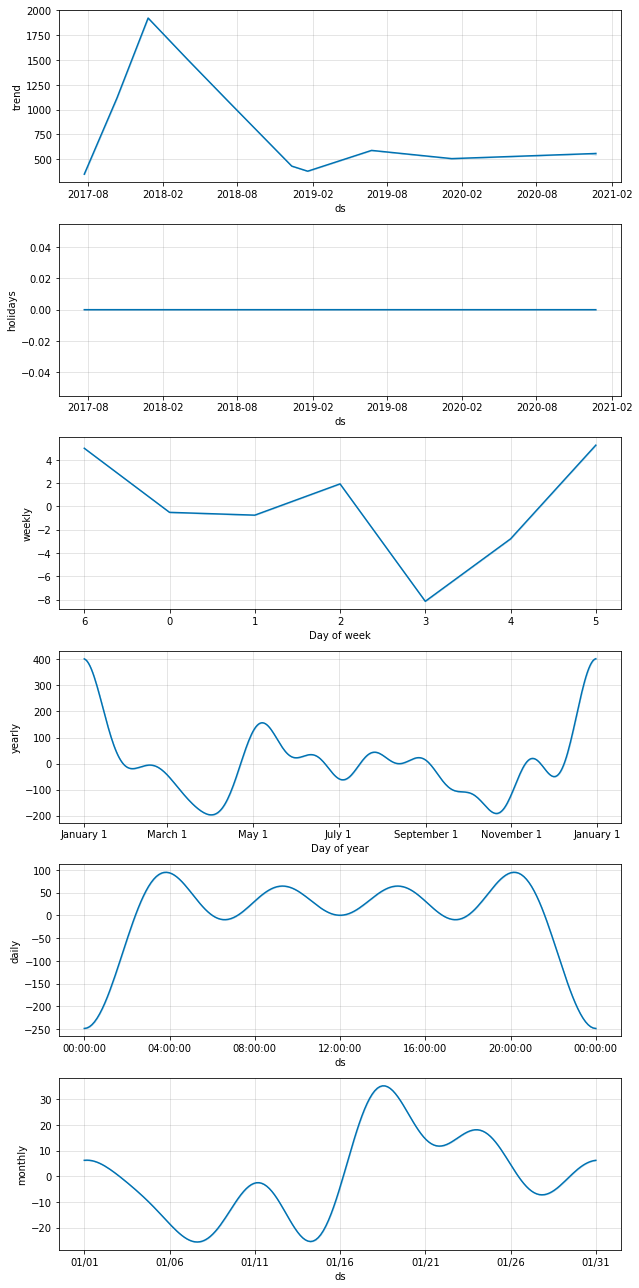

In [85]:
prophet_model_btc_cash.plot_components(forecast_btc_cash);

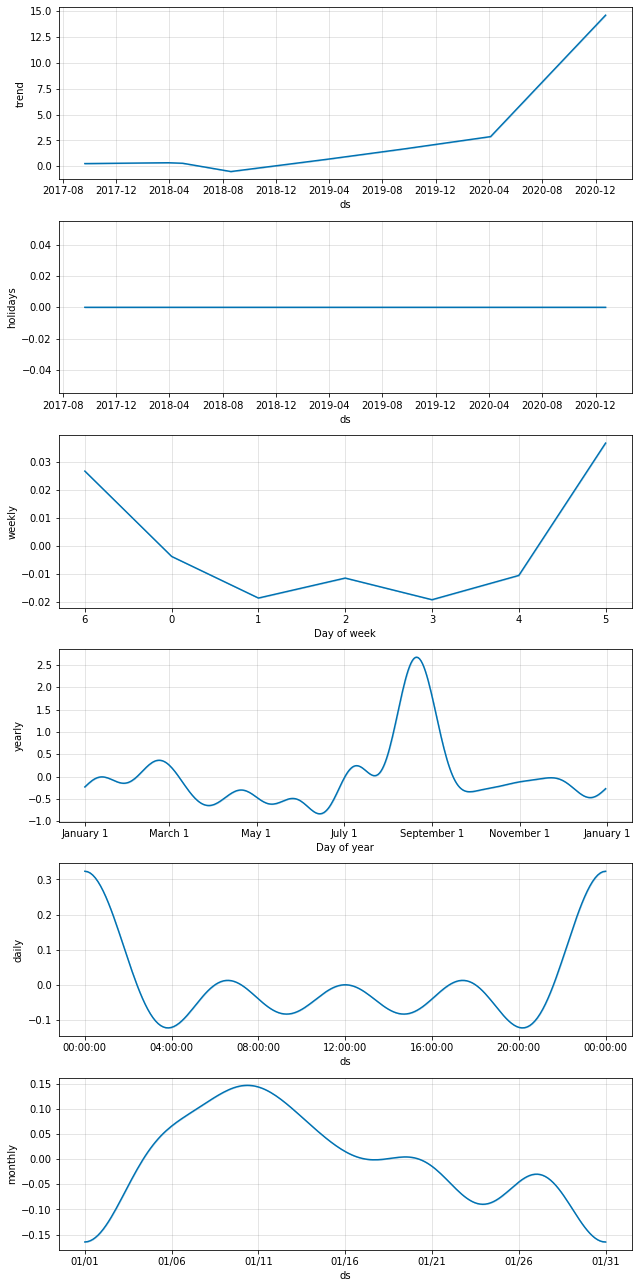

In [86]:
prophet_model_link.plot_components(forecast_link);

In [87]:
forecast_xrp.shape

(1858, 70)

In [88]:
forecast_xrp[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-19,0.254444,0.012239,0.464453
1854,2020-12-20,0.279684,0.047842,0.531678
1855,2020-12-21,0.304753,0.067307,0.525539
1856,2020-12-22,0.327888,0.104461,0.545036
1857,2020-12-23,0.354133,0.121592,0.588848


In [89]:
forecast_btc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-19,13893.060383,12386.057244,15338.524835
1854,2020-12-20,13919.837059,12411.203983,15310.776214
1855,2020-12-21,13962.794139,12352.964424,15300.341416
1856,2020-12-22,13909.037666,12437.064553,15184.014332
1857,2020-12-23,13855.209322,12514.953533,15330.909746


In [90]:
forecast_eth[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1853,2020-12-20,412.580969,316.420927,509.782268
1854,2020-12-21,417.965336,323.711240,510.513087
1855,2020-12-22,423.008383,330.749998,517.642812
1856,2020-12-23,424.267909,333.273827,527.291134
1857,2020-12-24,425.219889,325.520175,528.384767


In [91]:
forecast_btc_cash[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1246,2020-12-20,569.426508,328.833099,839.457016
1247,2020-12-21,607.935426,333.382984,869.970567
1248,2020-12-22,641.100354,377.701979,903.954228
1249,2020-12-23,661.994785,391.724275,922.113361
1250,2020-12-24,660.010674,404.707052,928.926368


In [92]:
forecast_link[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1187,2020-12-20,14.325461,13.074707,15.559335
1188,2020-12-21,14.330745,13.049615,15.600219
1189,2020-12-22,14.366427,13.103437,15.650200
1190,2020-12-23,14.432315,13.151913,15.712367
1191,2020-12-24,14.479726,13.140454,15.800599


# Performance of the prediction

In [93]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv_xrp = cross_validation(prophet_model_xrp, horizon='180 days')
df_cv_xrp.head()  

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-12 00:00:00 and 2020-05-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-13,0.270028,0.243765,0.295705,0.266153,2017-06-12
1,2017-06-14,0.275758,0.248508,0.302187,0.278447,2017-06-12
2,2017-06-15,0.281402,0.254093,0.306696,0.259266,2017-06-12
3,2017-06-16,0.286034,0.259025,0.313450,0.262068,2017-06-12
4,2017-06-17,0.288627,0.262038,0.316186,0.268351,2017-06-12


In [94]:
df_cv_btc = cross_validation(prophet_model_btc, horizon='180 days')
df_cv_btc.head()  

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-12 00:00:00 and 2020-05-27 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-13,2881.442008,2826.093315,2940.373136,2717.020020,2017-06-12
1,2017-06-14,2908.562965,2855.195279,2967.111045,2506.370117,2017-06-12
2,2017-06-15,2937.823544,2879.019745,3002.162994,2464.580078,2017-06-12
3,2017-06-16,2962.926127,2898.933979,3023.137471,2518.560059,2017-06-12
4,2017-06-17,2994.418484,2936.575549,3058.598360,2655.879883,2017-06-12


In [95]:
df_cv_eth = cross_validation(prophet_model_eth, horizon='180 days')
df_cv_eth.head()  

INFO:fbprophet:Making 13 forecasts with cutoffs between 2017-06-13 00:00:00 and 2020-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-14,306.838251,294.440054,318.707380,359.053009,2017-06-13
1,2017-06-15,309.408605,297.157942,321.512853,361.933014,2017-06-13
2,2017-06-16,312.907451,301.579882,324.812518,370.226990,2017-06-13
3,2017-06-17,317.071714,305.698238,328.683267,379.414001,2017-06-13
4,2017-06-18,321.819505,310.024203,333.697348,371.458008,2017-06-13


In [96]:
df_cv_btc_cash = cross_validation(prophet_model_btc_cash, horizon='180 days')
df_cv_btc_cash.head()  

INFO:fbprophet:Making 6 forecasts with cutoffs between 2019-03-05 00:00:00 and 2020-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-03-06,-276.788082,-586.475142,32.052637,133.267960,2019-03-05
1,2019-03-07,-333.389685,-649.516309,-22.048329,132.156082,2019-03-05
2,2019-03-08,-361.571830,-658.099863,-43.518519,129.470261,2019-03-05
3,2019-03-09,-379.867702,-699.880373,-52.951841,133.815567,2019-03-05
4,2019-03-10,-414.602474,-743.349546,-107.090604,132.837814,2019-03-05


In [97]:
df_cv_link = cross_validation(prophet_model_link, horizon='180 days')
df_cv_link.head()  

INFO:fbprophet:Making 5 forecasts with cutoffs between 2019-06-03 00:00:00 and 2020-05-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-06-04,0.853275,0.722733,0.993334,0.883250,2019-06-03
1,2019-06-05,0.827631,0.691368,0.969253,1.077118,2019-06-03
2,2019-06-06,0.809658,0.671016,0.951594,1.119633,2019-06-03
3,2019-06-07,0.800045,0.663605,0.937941,1.177613,2019-06-03
4,2019-06-08,0.802075,0.672456,0.941872,1.152620,2019-06-03


In [98]:
df_perf_xrp = performance_metrics(df_cv_xrp)
df_perf_xrp.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,0.089249,0.298746,0.175858,0.352474,0.709402
1,19 days,0.099865,0.316015,0.188368,0.376144,0.688034
2,20 days,0.122132,0.349474,0.204842,0.401300,0.662393
3,21 days,0.143558,0.378891,0.220535,0.425968,0.641026
4,22 days,0.167589,0.409377,0.236671,0.450033,0.623932


In [99]:
df_perf_btc = performance_metrics(df_cv_btc)
df_perf_btc.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,7.110955e+06,2666.637361,2106.541327,0.326777,0.311966
1,19 days,7.369252e+06,2714.636639,2158.234193,0.336709,0.307692
2,20 days,7.638111e+06,2763.713233,2211.241165,0.346060,0.299145
3,21 days,7.827332e+06,2797.736928,2245.681670,0.352777,0.294872
4,22 days,8.081049e+06,2842.718554,2287.259383,0.358706,0.286325


In [100]:
df_perf_eth = performance_metrics(df_cv_eth)
df_perf_eth.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,36220.436505,190.316674,124.981416,0.421682,0.529915
1,19 days,39240.516568,198.092192,129.969438,0.438367,0.525641
2,20 days,41776.936394,204.394071,133.590575,0.452473,0.517094
3,21 days,44182.531445,210.196412,136.774208,0.464547,0.508547
4,22 days,46436.775135,215.491938,139.836722,0.477749,0.500000


In [101]:
df_perf_btc_cash = performance_metrics(df_cv_btc_cash)
df_perf_btc_cash.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,94854.285193,307.984229,206.449046,1.147619,0.777778
1,19 days,102330.007047,319.890617,213.201855,1.186351,0.768519
2,20 days,111140.756646,333.377799,221.215348,1.230907,0.759259
3,21 days,120978.440598,347.819552,228.847248,1.274781,0.750000
4,22 days,131571.848459,362.728340,237.274404,1.316866,0.740741


In [102]:
df_perf_link = performance_metrics(df_cv_link)
df_perf_link.head()

,horizon,mse,rmse,mae,mape,coverage
0,18 days,0.714686,0.845391,0.757536,0.351721,0.111111
1,19 days,0.757340,0.870253,0.783869,0.369419,0.100000
2,20 days,0.789311,0.888432,0.802186,0.380524,0.100000
3,21 days,0.819354,0.905182,0.817477,0.391310,0.100000
4,22 days,0.844349,0.918884,0.828683,0.400417,0.111111


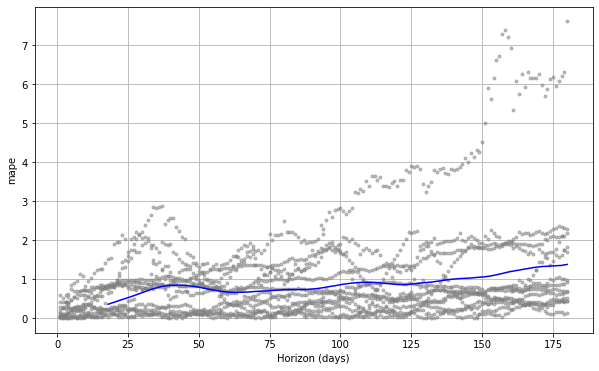

In [103]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv_xrp, metric='mape')

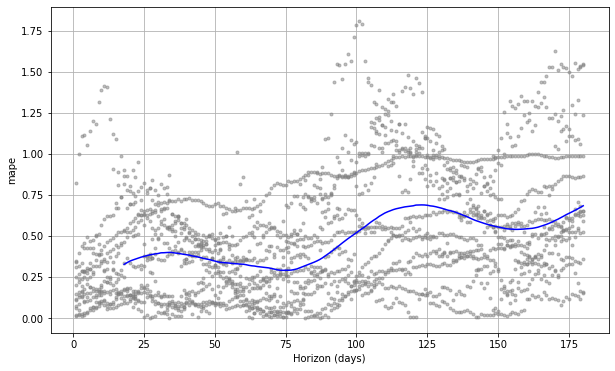

In [104]:
fig = plot_cross_validation_metric(df_cv_btc, metric='mape')

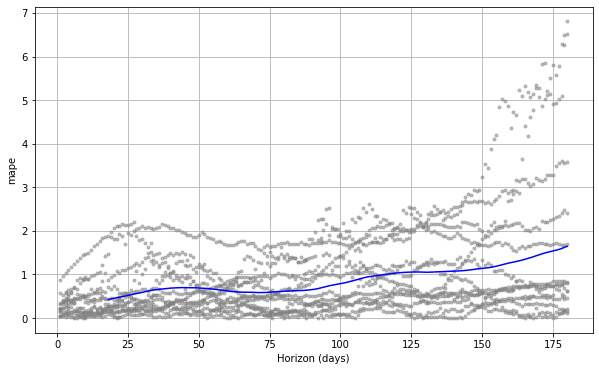

In [105]:
fig = plot_cross_validation_metric(df_cv_eth, metric='mape')

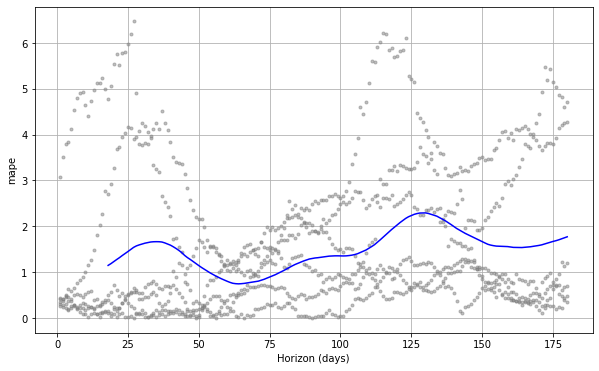

In [106]:
fig = plot_cross_validation_metric(df_cv_btc_cash, metric='mape')

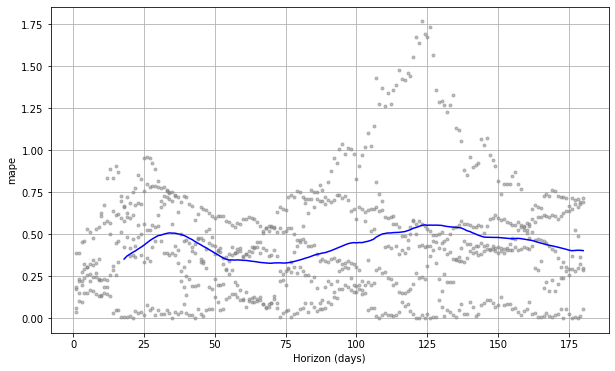

In [107]:
fig = plot_cross_validation_metric(df_cv_link, metric='mape')

# Monte carlo simulation for portfolio optimization

calculate the normalized returns from each of the coin investments

In [116]:
df_xrp = df_xrp.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc = df_btc.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_eth = df_eth.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_btc_cash = df_btc_cash.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])
df_link = df_link.drop(columns=['Open', 'High', 'Low', 'Volume','Adj Close','Avg_Price'])

In [117]:
for portfolio_df in (df_xrp, df_btc, df_eth, df_btc_cash,df_link): 
    portfolio_df['Normed Return'] = portfolio_df['Close'] /portfolio_df.iloc[0]['Close']

In [119]:
df_xrp

,Date,Close,Normed Return
0,2015-11-23,0.004288,1.000000
1,2015-11-24,0.004242,0.989272
2,2015-11-25,0.004318,1.006996
3,2015-11-26,0.004291,1.000700
4,2015-11-27,0.004276,0.997201
...,...,...,...
1823,2020-11-19,0.303766,70.840951
1824,2020-11-20,0.328068,76.508396
1825,2020-11-21,0.458344,106.889925
1826,2020-11-22,0.443700,103.474813


In [120]:
df_btc

,Date,Close,Normed Return
0,2015-11-23,323.045990,1.000000
1,2015-11-24,320.045990,0.990713
2,2015-11-25,328.205994,1.015973
3,2015-11-26,352.683990,1.091745
4,2015-11-27,358.041992,1.108331
...,...,...,...
1823,2020-11-19,17817.089844,55.153416
1824,2020-11-20,18621.314453,57.642921
1825,2020-11-21,18642.232422,57.707673
1826,2020-11-22,18370.001953,56.864974


Portfolio Allocation
starting Portfolio Allocations consisting of these 5 coins  -

15% in XRP
10% in BTC
20% in ETH
25% in BTC_CASH
30% in LINK

In [121]:
for portfolio_df, allocation in zip((df_xrp, df_btc, df_eth, df_btc_cash,df_link),[.15,.1,.2,.25,.3]):
    portfolio_df['Allocation'] = portfolio_df['Normed Return']*allocation

In [123]:
df_xrp.head()

,Date,Close,Normed Return,Allocation
0,2015-11-23,0.004288,1.000000,0.150000
1,2015-11-24,0.004242,0.989272,0.148391
2,2015-11-25,0.004318,1.006996,0.151049
3,2015-11-26,0.004291,1.000700,0.150105
4,2015-11-27,0.004276,0.997201,0.149580


In [124]:
df_btc.head()

,Date,Close,Normed Return,Allocation
0,2015-11-23,323.045990,1.000000,0.100000
1,2015-11-24,320.045990,0.990713,0.099071
2,2015-11-25,328.205994,1.015973,0.101597
3,2015-11-26,352.683990,1.091745,0.109175
4,2015-11-27,358.041992,1.108331,0.110833


Assuming the starting portfolio Position of $20,000, lets look at how the value of our position changes for each coin

In [125]:
# value of each position
for portfolio_df in (df_xrp, df_btc, df_eth, df_btc_cash,df_link):
    portfolio_df['Position Value'] = portfolio_df['Allocation']*20000

In [126]:
df_xrp.head()

,Date,Close,Normed Return,Allocation,Position Value
0,2015-11-23,0.004288,1.000000,0.150000,3000.000000
1,2015-11-24,0.004242,0.989272,0.148391,2967.817164
2,2015-11-25,0.004318,1.006996,0.151049,3020.988806
3,2015-11-26,0.004291,1.000700,0.150105,3002.098881
4,2015-11-27,0.004276,0.997201,0.149580,2991.604478


In [127]:
df_btc.head()

,Date,Close,Normed Return,Allocation,Position Value
0,2015-11-23,323.045990,1.000000,0.100000,2000.000000
1,2015-11-24,320.045990,0.990713,0.099071,1981.426793
2,2015-11-25,328.205994,1.015973,0.101597,2031.945941
3,2015-11-26,352.683990,1.091745,0.109175,2183.490902
4,2015-11-27,358.041992,1.108331,0.110833,2216.662662


In [134]:
df_eth.head()

,Date,Close,Normed Return,Allocation,Position Value
0,2015-11-24,0.900191,1.000000,0.200000,4000.000000
1,2015-11-25,0.863537,0.959282,0.191856,3837.127898
2,2015-11-26,0.884183,0.982217,0.196443,3928.868429
3,2015-11-27,0.867951,0.964185,0.192837,3856.741514
4,2015-11-28,0.915703,1.017232,0.203446,4068.927594


In [129]:
del(portfolio_df)

In [135]:
df_xrp = df_xrp.set_index('Date')
df_btc = df_btc.set_index('Date')
df_eth = df_eth.set_index('Date')
df_btc_cash = df_btc_cash.set_index('Date')
df_link = df_link.set_index('Date')

In [136]:
# create list of all position values
position_vals = [df_xrp['Position Value'], df_btc['Position Value'], df_eth['Position Value'], df_btc_cash['Position Value'], df_link['Position Value']]

# concatenate the list of position values
portfolio_df = pd.concat(position_vals, axis=1)

# set the column names
portfolio_df.columns = ['Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash','Chain Link']

# add a total portfolio column
portfolio_df['Total'] = portfolio_df.sum(axis=1)

In [137]:
portfolio_df

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link,Total
2015-11-23,3000.000000,2000.000000,NaN,NaN,NaN,5.000000e+03
2015-11-24,2967.817164,1981.426793,4.000000e+03,NaN,NaN,8.949244e+03
2015-11-25,3020.988806,2031.945941,3.837128e+03,NaN,NaN,8.890063e+03
2015-11-26,3002.098881,2183.490902,3.928868e+03,NaN,NaN,9.114458e+03
2015-11-27,2991.604478,2216.662662,3.856742e+03,NaN,NaN,9.065009e+03
...,...,...,...,...,...,...
2020-11-20,229525.186567,115285.841827,2.265051e+06,3133.381594,446539.465546,3.059535e+06
2020-11-21,320669.776119,115415.346416,2.441645e+06,3654.733047,487064.752993,3.368449e+06
2020-11-22,310424.440299,113729.948810,2.479776e+06,3473.991786,458165.125684,3.365570e+06
2020-11-23,429556.902985,113693.540006,2.703666e+06,3910.156146,484365.839347,3.735193e+06


Plotting the portfolio

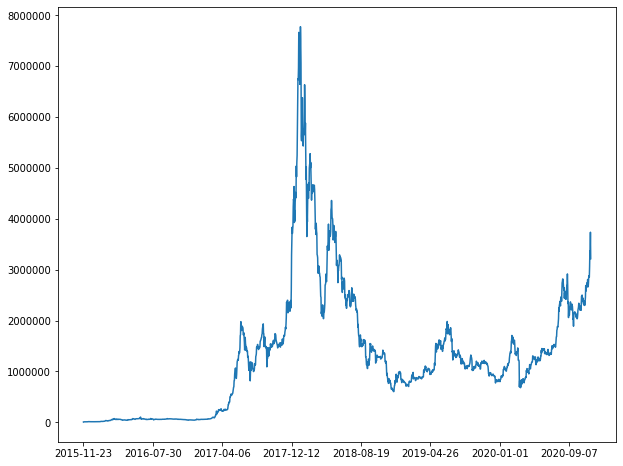

In [138]:
portfolio_df['Total'].plot(figsize=(10,8))

In [ ]:
Plotting the individual portfolio contributions

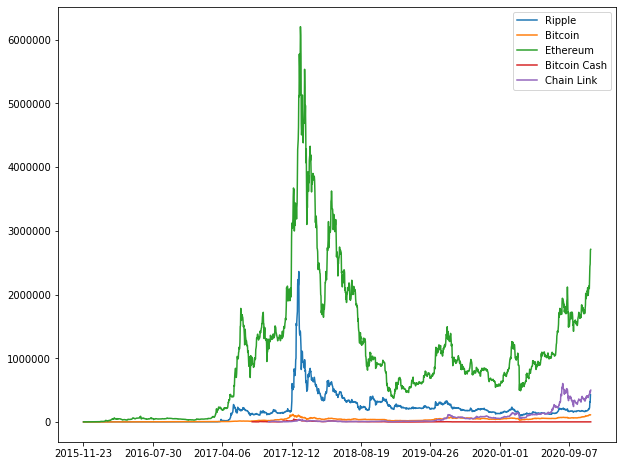

In [139]:
portfolio_df.drop('Total',axis=1).plot(figsize=(10,8))

In [141]:
# Daily Return
portfolio_df['Daily Return'] = portfolio_df['Total'].pct_change(1)
portfolio_df

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link,Total,Daily Return
2015-11-23,3000.000000,2000.000000,NaN,NaN,NaN,5.000000e+03,NaN
2015-11-24,2967.817164,1981.426793,4.000000e+03,NaN,NaN,8.949244e+03,0.789849
2015-11-25,3020.988806,2031.945941,3.837128e+03,NaN,NaN,8.890063e+03,-0.006613
2015-11-26,3002.098881,2183.490902,3.928868e+03,NaN,NaN,9.114458e+03,0.025241
2015-11-27,2991.604478,2216.662662,3.856742e+03,NaN,NaN,9.065009e+03,-0.005425
...,...,...,...,...,...,...,...
2020-11-20,229525.186567,115285.841827,2.265051e+06,3133.381594,446539.465546,3.059535e+06,0.072180
2020-11-21,320669.776119,115415.346416,2.441645e+06,3654.733047,487064.752993,3.368449e+06,0.100968
2020-11-22,310424.440299,113729.948810,2.479776e+06,3473.991786,458165.125684,3.365570e+06,-0.000855
2020-11-23,429556.902985,113693.540006,2.703666e+06,3910.156146,484365.839347,3.735193e+06,0.109825


Plotting the Daily return for our portfolio

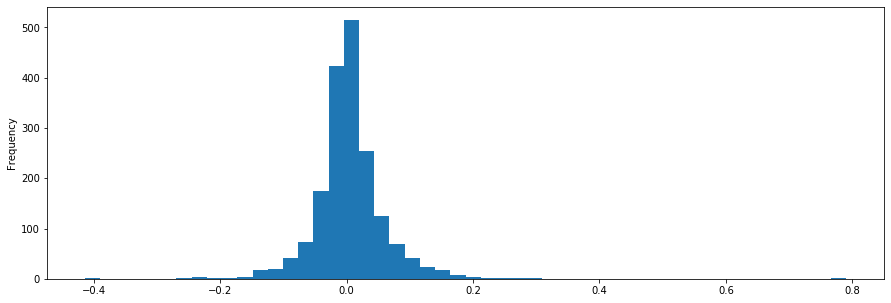

In [145]:
# average daily return
portfolio_df['Daily Return'].mean()

# standard deviation
portfolio_df['Daily Return'].std()

# plot histogram of daily returns
portfolio_df['Daily Return'].plot(kind='hist', bins=50, figsize=(15,5))

The daily return is mostly centered around zero

In [146]:
# cumulative portfolio return
cumulative_return = 100 * (portfolio_df['Total'][-1]/portfolio_df['Total'][0] - 1)
cumulative_return

64218.65807297268

# Sharpe's ratio

Sharpe Ratio = mean (portfolio return - the risk free rate) % standard deviation.

In [147]:
sharpe_ratio = portfolio_df['Daily Return'].mean() / portfolio_df['Daily Return'].std()
annual_sharpe_ratio = (252**0.5) * sharpe_ratio
annual_sharpe_ratio

1.4274528231993593

Lets check a bunch of random allocations of different coins and find out which coins have the best sharpe's ratio. This is what we call as monte carlo simulations.

We will randomly assign weights to our coins in the portfolio using mcmc and then calculate the mean daily return & SD (Standard deviation) of return. Then we can calculate the Sharpe Ratio for many randomly selected allocations.

# Monte carlo simulations

In [149]:
mc_df = pd.concat([df_xrp.Close, df_btc.Close, df_eth.Close, df_btc_cash.Close,df_link.Close], axis=1)
mc_df.columns = ['Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash','Chain Link']
mc_df



,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link
2015-11-23,0.004288,323.045990,NaN,NaN,NaN
2015-11-24,0.004242,320.045990,0.900191,NaN,NaN
2015-11-25,0.004318,328.205994,0.863537,NaN,NaN
2015-11-26,0.004291,352.683990,0.884183,NaN,NaN
2015-11-27,0.004276,358.041992,0.867951,NaN,NaN
...,...,...,...,...,...
2020-11-20,0.328068,18621.314453,509.744568,258.854919,14.078273
2020-11-21,0.458344,18642.232422,549.486633,301.924805,15.355934
2020-11-22,0.443700,18370.001953,558.068115,286.993408,14.444801
2020-11-23,0.613980,18364.121094,608.454041,323.025818,15.270844


In [151]:
mc_df.tail().pct_change(1).mean()

Ripple          0.187231
Bitcoin        -0.003450
Ethereum        0.046669
Bitcoin Cash    0.071774
Chain Link      0.030524
dtype: float64

In [152]:
mc_df.tail().pct_change(1).head()

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link
2020-11-20,NaN,NaN,NaN,NaN,NaN
2020-11-21,0.397101,0.001123,0.077965,0.166386,0.090754
2020-11-22,-0.031950,-0.014603,0.015617,-0.049454,-0.059334
2020-11-23,0.383773,-0.000320,0.090286,0.125551,0.057186
2020-11-24,0.000000,0.000000,0.002809,0.044612,0.033489


In [153]:
# log daily return
log_return = np.log(mc_df/mc_df.shift(1))
log_return.head()

,Ripple,Bitcoin,Ethereum,Bitcoin Cash,Chain Link
2015-11-23,NaN,NaN,NaN,NaN,NaN
2015-11-24,-0.010786,-0.009330,NaN,NaN,NaN
2015-11-25,0.017757,0.025177,-0.041570,NaN,NaN
2015-11-26,-0.006273,0.071931,0.023627,NaN,NaN
2015-11-27,-0.003502,0.015078,-0.018529,NaN,NaN


In [155]:
print(mc_df.columns)

weights = np.array(np.random.random(5))
print('Random Weights:')
print(weights)

print('Rebalance')
weights = weights/np.sum(weights)
print(weights)

Index(['Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash', 'Chain Link'], dtype='object')
Random Weights:
[0.11114486 0.28928923 0.85004075 0.87986544 0.71286856]
Rebalance
[0.03909135 0.10174744 0.29897232 0.30946212 0.25072677]


In [156]:
# expected return
print('Expected Portfolio Return')
exp_ret = np.sum((log_return.mean()*weights)*252)
print(exp_ret)

# expected volatility
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))
print(exp_vol)

# Sharpe Ratio
print('Sharpe Ratio')
SR = exp_ret/exp_vol
print(SR)

Expected Portfolio Return
0.5801267704157853
Expected Volatility
0.8357307422527799
Sharpe Ratio
0.6941551160987648


Lets repeat this process a few thousand times to simulate using monte carlo

In [174]:
num_ports = 12000
all_weights = np.zeros((num_ports, len(mc_df.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports): 
    # weights 
    weights = np.array(np.random.random(5)) 
    weights = weights/np.sum(weights)  
    # save the weights
    all_weights[ind,:] = weights
    # expected return 
    ret_arr[ind] = np.sum((log_return.mean()*weights)*252)

    # expected volatility 
    vol_arr[ind] = np.sqrt(np.dot(weights.T,np.dot(log_return.cov()*252, weights)))

    # Sharpe Ratio 
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [175]:
sharpe_arr.max()

1.0862841542151973

If we then get the location of the maximum Sharpe Ratio and then get the allocation for that index. This shows us the optimal allocation out of the 10000 random allocations

In [176]:
sharpe_arr.argmax()

4306

In [179]:
all_weights[4306, :]*100

array([ 6.3145833 , 40.42888424, 43.98763058,  0.19503443,  9.07386746])



These are the best allocations we have received using MCMC. Lets compare how we did from the original Allocation

Original Allocation -

15% in XRP
10% in BTC
20% in ETH
25% in BTC_CASH
30% in LINK

MCMC Allocation -

  6.31% in XRP
  40.4% in BTC
  43.98% in ETH
  0.19% IN BTC_CASH
  9.07% LINK 



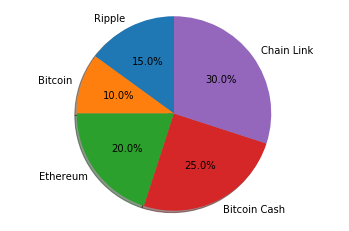

In [182]:
# Initial Allocation
labels = 'Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash', 'Chain Link'
sizes = [15, 10, 20, 25,30]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

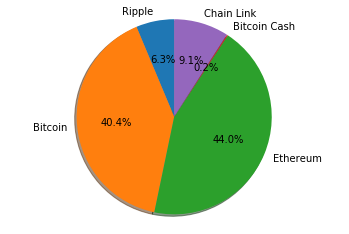

In [183]:
# After Monte Carlo Simulations

labels = 'Ripple', 'Bitcoin', 'Ethereum', 'Bitcoin Cash', 'Chain Link'
sizes = [6.31, 40.4, 43.98, 0.19,9.07]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()